In [87]:
from sklearn.datasets import fetch_20newsgroups
news = fetch_20newsgroups(subset="all")

In [88]:
len(news.data)

18846

In [90]:
print(news.data[0])

From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




In [3]:
print(news.target_names[news.target[0]])

rec.sport.hockey


In [4]:

from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(news.data)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [94]:
print(X[:10, :10].toarray())

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [3 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [5]:
index = vec.vocabulary_.get("jagr")
print([x for x in range(X.shape[0]) if X[x, index]])

[0, 629, 1803, 2867, 3192, 3925, 3958, 4950, 5180, 5384, 6477, 6760, 7028, 7684, 7803, 8130, 8724, 8755, 8817, 9119, 9218, 10620, 12405, 12498, 13225, 13278, 13954, 14105, 14227, 15032, 15810, 16217, 16639, 16876, 17520, 17649, 17776, 18022, 18642, 18680]


In [6]:
#using TF-IDF method to optimize the count
from sklearn.feature_extraction.text import TfidfTransformer
TFIDF = TfidfTransformer()
X_tfidf = TFIDF.fit_transform(X)

In [95]:
print(X_tfidf[:10, :10].toarray())

[[ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.14795455  0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0

In [8]:
total = X.sum(axis=0).A[0]
total_tfidf = X_tfidf.sum(axis=0).A[0]
total_tfidf


array([ 59.73987114,  42.86875815,   0.6540125 , ...,   0.09863695,
         0.36465923,   0.11190675])

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

<Container object of 173762 artists>

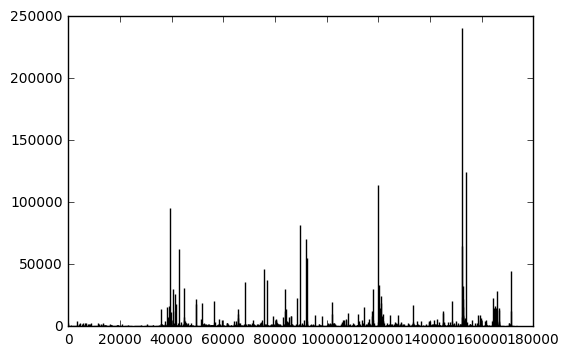

In [10]:
plt.bar(range(len(total)), total)

<Container object of 173762 artists>

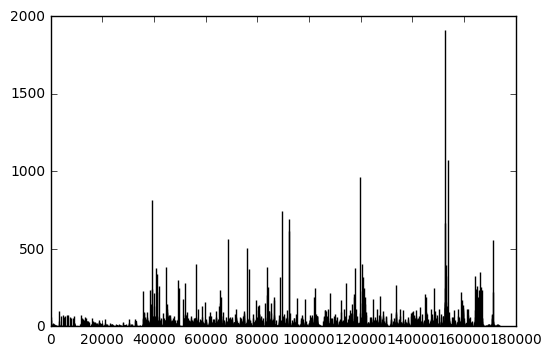

In [10]:

plt.bar(range(len(total_tfidf)), total_tfidf)

In [71]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, news.target, test_size=0.25, random_state=233)
tf_Xtrain, tf_Xtest, tf_ytrain, tf_ytest = train_test_split(X_tfidf, news.target, test_size=0.25, random_state=233)

In [72]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
tf_mnb = MultinomialNB()

In [73]:
mnb.fit(Xtrain, ytrain)
tf_mnb.fit(tf_Xtrain, tf_ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [74]:
from sklearn.metrics import classification_report
ypredict = mnb.predict(Xtest)
print("Naive Bayes Accuracy: {0}\n".format(mnb.score(Xtest, ytest)))
print(classification_report(ytest, ypredict, target_names=news.target_names))

Naive Bayes Accuracy: 0.8448641765704584

                          precision    recall  f1-score   support

             alt.atheism       0.92      0.89      0.90       227
           comp.graphics       0.61      0.87      0.71       254
 comp.os.ms-windows.misc       1.00      0.14      0.25       235
comp.sys.ibm.pc.hardware       0.68      0.83      0.75       252
   comp.sys.mac.hardware       0.86      0.86      0.86       237
          comp.windows.x       0.76      0.89      0.82       243
            misc.forsale       0.91      0.65      0.76       256
               rec.autos       0.87      0.90      0.89       250
         rec.motorcycles       0.98      0.92      0.95       279
      rec.sport.baseball       0.96      0.94      0.95       233
        rec.sport.hockey       0.97      0.97      0.97       241
               sci.crypt       0.90      0.95      0.92       246
         sci.electronics       0.84      0.81      0.83       233
                 sci.med       0.

In [79]:

tf_ypredict = tf_mnb.predict(tf_Xtest)
print("Naive Bayes with TF-IDF dataset Accuracy: {0}\n".format(tf_mnb.score(tf_Xtest, tf_ytest)))
print(classification_report(tf_ytest, tf_ypredict, target_names=news.target_names))

Naive Bayes with TF-IDF dataset Accuracy: 0.8531409168081494

                          precision    recall  f1-score   support

             alt.atheism       0.93      0.71      0.81       227
           comp.graphics       0.89      0.73      0.80       254
 comp.os.ms-windows.misc       0.79      0.86      0.82       235
comp.sys.ibm.pc.hardware       0.79      0.83      0.81       252
   comp.sys.mac.hardware       0.90      0.83      0.87       237
          comp.windows.x       0.93      0.85      0.89       243
            misc.forsale       0.94      0.70      0.80       256
               rec.autos       0.88      0.91      0.90       250
         rec.motorcycles       0.97      0.94      0.95       279
      rec.sport.baseball       0.95      0.95      0.95       233
        rec.sport.hockey       0.90      0.98      0.94       241
               sci.crypt       0.73      0.98      0.84       246
         sci.electronics       0.85      0.82      0.84       233
             

In [81]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(tf_Xtrain, tf_ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [82]:
svm_ypredict = svc.predict(tf_Xtest)
print("SVM Accuracy: {0}\n".format(svc.score(tf_Xtest, tf_ytest)))
print(classification_report(tf_ytest, svm_ypredict, target_names=news.target_names))

SVM Accuracy: 0.9187181663837012

                          precision    recall  f1-score   support

             alt.atheism       0.96      0.92      0.94       227
           comp.graphics       0.80      0.88      0.84       254
 comp.os.ms-windows.misc       0.84      0.86      0.85       235
comp.sys.ibm.pc.hardware       0.81      0.85      0.83       252
   comp.sys.mac.hardware       0.91      0.91      0.91       237
          comp.windows.x       0.89      0.91      0.90       243
            misc.forsale       0.89      0.90      0.90       256
               rec.autos       0.92      0.93      0.93       250
         rec.motorcycles       0.98      0.94      0.96       279
      rec.sport.baseball       0.96      0.97      0.97       233
        rec.sport.hockey       0.98      0.98      0.98       241
               sci.crypt       0.98      0.93      0.96       246
         sci.electronics       0.83      0.88      0.86       233
                 sci.med       0.92      